<a href="https://colab.research.google.com/github/TypoChlen/heart-attack-prediction-ml/blob/main/Boston_Pricing_RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook in which i will make a regression deep learning model that will try to predict whine quality based on the features(components of the wine).
I will make 2 models, one for predicting the quality of red wine whereas other for white.

## Features:
Input variables (based on physicochemical tests):
   1. - fixed acidity
   2. - volatile acidity
   3. - citric acid
   4. - residual sugar
   5. - chlorides
   6. - free sulfur dioxide
   7. - total sulfur dioxide
   8. - density
   9. - pH
   10. - sulphates
   11. - alcohol

### Output variable (based on sensory data):

   12. - quality (score between 0 and 10)



In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# libraries for working wiht data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [2]:
red = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-red.csv', sep=';')
white = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-white.csv', sep=';')

In [3]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Split our data into train and test sets

In [5]:
# For red dataset
X_r = red.copy()
y_r = X_r.pop('quality')

# For white dataset
X_w = white.copy()
y_w = X_w.pop('quality')

In [6]:
# Split the data into train and test sets for red and white wines
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

X_train_r, X_train_w

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 493             8.7             0.690         0.31             3.0      0.086   
 354             6.1             0.210         0.40             1.4      0.066   
 342            10.9             0.390         0.47             1.8      0.118   
 834             8.8             0.685         0.26             1.6      0.088   
 705             8.4             1.035         0.15             6.0      0.073   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

## Data Preprocessing
1. Imputation
2. Encoding
3. Feature Scaling

### Imputation:
Imputation is a method that deal with missing values, they can be handled by many ways, the most common is replacing missing values with mean value of the column. In our case we don't have missing vlues so we skip this seciton

### Encoding:
Model can't read categorical data but only  numerical, encoders transform categorical data into numerical. The most common types of encoding are:
1. Label Encoding
2. Numerical Encoding
3. One-Hot encoding
In our case we don't have numerical data so skip this section

### Feature Scaling:
Feature engineering helps the model to perform better on the data. It ensures that all features contribute equally to the model. Common methods of it are:
1. Min-Max Scaling(Normalization) - It's a way when we transform the data into a fixed range between 0 and 1. Regressin models require normalization
2. Standardization - It rescales all features so they have a mean of 0 and standrad deviation of 1. Standardization is better for linear models

I will Use Normalization

In [7]:
def apply_minmax_scaling(X_train, X_test, features_to_scale=['fixed acidity', 'residual sugar',
                                                'free sulfur dioxide','total sulfur dioxide', 'pH', 'alcohol']):
  scaler = MinMaxScaler()

  X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
  X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])

  return X_train, X_test

In [8]:
apply_minmax_scaling(X_train_r, X_test_r)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 493        0.362832             0.690         0.31        0.143836      0.086   
 354        0.132743             0.210         0.40        0.034247      0.066   
 342        0.557522             0.390         0.47        0.061644      0.118   
 834        0.371681             0.685         0.26        0.047945      0.088   
 705        0.336283             1.035         0.15        0.349315      0.073   
 ...             ...               ...          ...             ...        ...   
 1130       0.398230             0.600         0.00        0.068493      0.058   
 1294       0.318584             0.635         0.10        0.082192      0.073   
 860        0.230088             0.620         0.06        0.123288      0.077   
 1459       0.292035             0.200         0.35        0.054795      0.054   
 1126       0.106195             0.290         0.26        0.054795      0.063   
 
       free su

In [9]:
apply_minmax_scaling(X_train_w, X_test_w)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 4665         0.4375              0.17         0.36        0.116564      0.028   
 1943         0.3125              0.25         0.44        0.168712      0.041   
 3399         0.2250              0.32         0.33        0.104294      0.037   
 843          0.3875              0.19         0.35        0.016871      0.036   
 2580         0.4875              0.30         0.26        0.281442      0.053   
 ...             ...               ...          ...             ...        ...   
 4426         0.3000              0.21         0.52        0.090491      0.047   
 466          0.4000              0.14         0.32        0.128834      0.039   
 3092         0.4750              0.27         0.52        0.039877      0.043   
 3772         0.3125              0.24         0.29        0.200920      0.035   
 860          0.5375              0.27         0.35        0.016871      0.030   
 
       free su

In [109]:
def train_fit_model(X_train, y_train, X_test, y_test):
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(11,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(
      loss='mae',
      optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
      metrics=['mae'],
  )

  early_stopping = EarlyStopping(
      monitor='val_loss',
      patience=2,
      restore_best_weights=True
  )

  history = model.fit(X_train, y_train, validation_split=0.2,
            epochs=100, callbacks=[early_stopping], verbose=0)

  train_loss = history.history['loss']
  val_loss = history.history.get('val_loss')  # Check if validation loss is available

  # Plot the loss
  plt.figure(figsize=(10, 6))
  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.title('Loss vs. Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  return model.evaluate(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


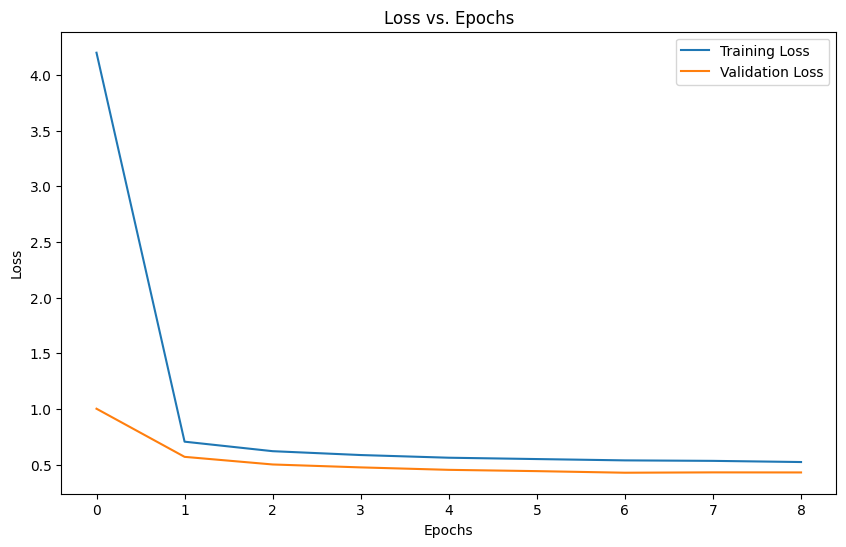

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5278 - mae: 0.5278 


[0.5267456769943237, 0.5267456769943237]

In [110]:
train_fit_model(X_train_r, y_train_r, X_test_r, y_test_r)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


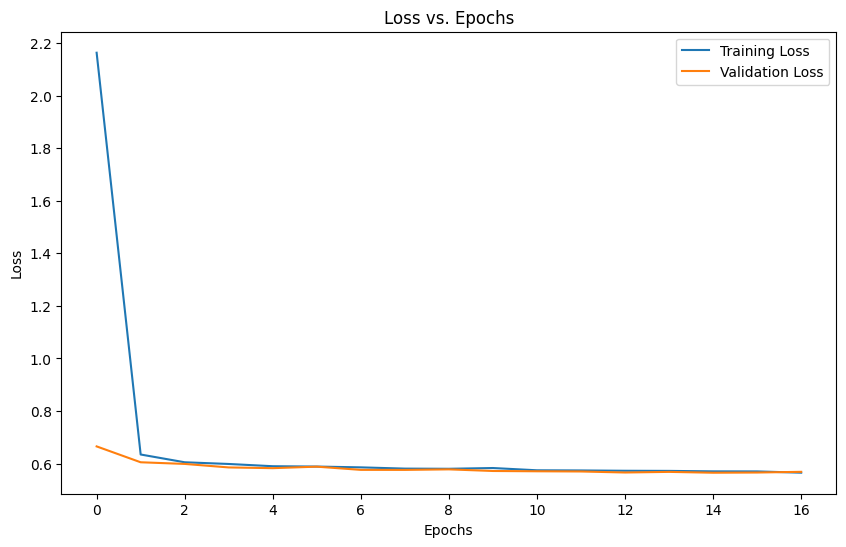

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6869 - mae: 0.6869 


[0.6671000123023987, 0.6671000123023987]

In [111]:
train_fit_model(X_train_w, y_train_w, X_test_w, y_test_w)